<a href="https://colab.research.google.com/github/Sruthi-Reddy-B/Insurance_claim_prediction/blob/main/notebooks/eda_model_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Clone repo
!git clone https://github.com/Sruthi-Reddy-B/Insurance_claim_prediction.git
%cd Insurance_claim_prediction

Cloning into 'Insurance_claim_prediction'...
remote: Enumerating objects: 113, done.
remote: Counting objects: 100% (113/113), done.
remote: Compressing objects: 100% (109/109), done.
remote: Total 113 (delta 49), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (113/113), 56.79 KiB | 1.83 MiB/s, done.
Resolving deltas: 100% (49/49), done.
/content/Insurance_claim_prediction


In [2]:
#if git repo not cloned

'''import pandas as pd
# Load CSV from GitHub directly
url = "https://raw.githubusercontent.com/Sruthi-Reddy-B/Insurance_claim_prediction/main/data/sample_claims.csv"

data = pd.read_csv(url)
data.head()'''

!ls

app  data  LICENSE  notebooks  README.md  requirements.txt  results  src


In [3]:
# Install necessary packages
!pip install -r requirements.txt -q


# Insurance Claim Prediction — End-to-End ML Pipeline

## 1. Load Data

In [10]:
import pandas as pd

#data = pd.read_csv('./data/sample_claims.csv')
data = pd.read_csv('./data/sample_claims_realistic.csv')
data.head()

,Age,Vehicle_Age,Vehicle_Damage,Previously_Claimed,Policy_Sales_Channel,Vintage,Claim_Approved
0,32,3,1,0,12,23,1
1,45,5,1,0,35,40,1
2,28,2,0,0,20,15,0
3,54,8,1,1,8,10,1
4,39,1,0,0,25,18,0


## 2. Data Preprocessing

In [17]:

# Convert categorical variables
data['Vehicle_Damage'] = data['Vehicle_Damage'].map({'Yes':1,'No':0})

# Split features and target
X = data.drop('Claim_Approved', axis=1)
y = data['Claim_Approved']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, stratify=y, random_state=42
)

## 3. Train Model

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.8837209302325582
Confusion Matrix:
 [[15  2]
 [ 3 23]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.86        17
           1       0.92      0.88      0.90        26

    accuracy                           0.88        43
   macro avg       0.88      0.88      0.88        43
weighted avg       0.89      0.88      0.88        43



## 4. Save Model


In [19]:
import joblib
import os

# Ensure src folder exists
os.makedirs('./src', exist_ok=True)

# Save model
joblib.dump(model, './src/claim_model.pkl')
print("Model saved as claim_model.pkl in ./src/")



Model saved as claim_model.pkl in ./src/


## 5. Results Visualization

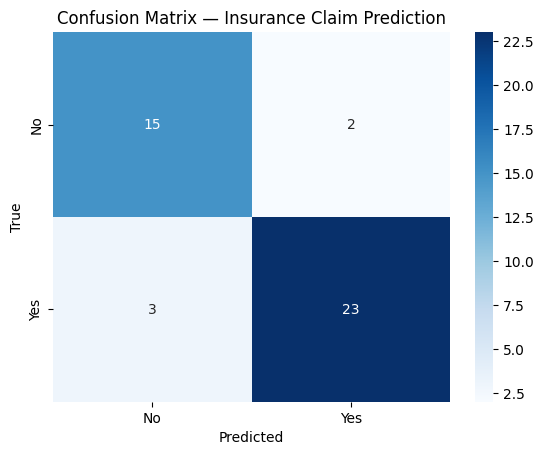

In [20]:

import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix — Insurance Claim Prediction")
plt.show()

#6. Export results

Confusion matrix saved to ./results/confusion_matrix.png


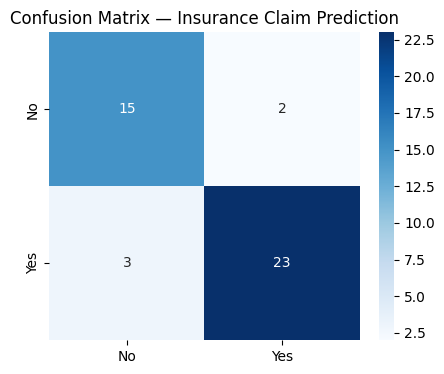

In [21]:
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title("Confusion Matrix — Insurance Claim Prediction")
plt.savefig('./results/confusion_matrix.png', bbox_inches='tight')
print("Confusion matrix saved to ./results/confusion_matrix.png")